# BDAT 1004: Problem Set 3
Carolyn Knight - 200289345

<h2> <font color = '#00A170'</font> Question 1 - Occupations</h2>

<a href= "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"> Occupations Dataset </a> 

In [1]:
# import necessary libraries
import pandas as pd

In [2]:
# import data from GitHub and into DataFrame
df1 = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', "|")

# set index of DataFrame to 'user_id'
# name DataFrame 'users'
users = df1.set_index(['user_id'])
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


<h3><font color = '#00A170'</font> Step 4</h3>
<p>Discover the mean age per occupation</p>

In [3]:
users.groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


<h3><font color = '#00A170'</font> Step 5</h3>
<p>Discover the ratio per occupation and sort it from the highest to lowest </p>
<p>Reference:</p>
<a href="https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html">https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html</a>

In [4]:
# count number of each sex by occupation ('aggfunc')
# aggregate by age ('values')
# columns: female and male
# index: occupation
# fill empty values with 0 ('fill_value')

maleRatio = pd.pivot_table(users, aggfunc = 'count', values = 'age', index = 'occupation', columns = 'gender', fill_value = 0)
maleRatio

gender,F,M
occupation,,
administrator,36,43
artist,13,15
doctor,0,7
educator,26,69
engineer,2,65
entertainment,2,16
executive,3,29
healthcare,11,5
homemaker,6,1


In [5]:
# determine the total number of individuals of each occupation
# axis =1 (summed across each row)
total = maleRatio[['F','M']].sum(axis = 1)
total

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
dtype: int64

In [6]:
# ratio = number of males/total number of people
maleRatio['maleRatio'] = (maleRatio['M']/total)

# sort by largest to smallest
maleRatio.sort_values(by = ['maleRatio'], ascending = False)

gender,F,M,maleRatio
occupation,,,
doctor,0,7,1.000000
engineer,2,65,0.970149
technician,1,26,0.962963
retired,1,13,0.928571
programmer,6,60,0.909091
executive,3,29,0.906250
scientist,3,28,0.903226
entertainment,2,16,0.888889
lawyer,2,10,0.833333


<h3><font color = '#00A170'</font> Step 6a</h3>
<p>For each occupation, calculate the minimum age</p>

In [7]:
users.groupby('occupation').min('age')

,age
occupation,
administrator,21
artist,19
doctor,28
educator,23
engineer,22
entertainment,15
executive,22
healthcare,22
homemaker,20


<h3><font color = '#00A170'</font> Step 6b</h3>
<p>For each occupation, calculate the maximum age</p>

In [8]:
users.groupby('occupation').max('age')

,age
occupation,
administrator,70
artist,48
doctor,64
educator,63
engineer,70
entertainment,50
executive,69
healthcare,62
homemaker,50


<h3><font color = '#00A170'</font> Step 7</h3>
<p>For each combination of occupation and gender, calculate the mean age</p>

In [9]:
users.groupby(['occupation', 'gender']).mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

<h3><font color = '#00A170'</font> Step 8</h3>
<p>For each occupation, present the percentage of women and men</p>

<p> References: </p>
<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html</a>
<a href= "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html </a>

In [10]:
# Reusing some of the code from Step 5:
maleRatio = pd.pivot_table(users, aggfunc = 'count', values = 'age', index = 'occupation', columns = 'gender', fill_value = 0)

# determine percentage of males -> multiple ratio by 100 to get %
maleRatio['male %'] = (maleRatio['M']/total)*100

# determine percentage of females
maleRatio['female %'] = (1 - (maleRatio['M']/total))*100

# round percentage to nearest tenth
# remove raw values from table
maleRatio.round(decimals = 1).drop(columns= ['M','F'], axis = 0)

gender,male %,female %
occupation,,
administrator,54.4,45.6
artist,53.6,46.4
doctor,100.0,0.0
educator,72.6,27.4
engineer,97.0,3.0
entertainment,88.9,11.1
executive,90.6,9.4
healthcare,31.2,68.8
homemaker,14.3,85.7


<h2> <font color = '#0033399'</font> Question 2 - Euro Teams</h2>

<a href= "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"> Euro Teams Dataset </a> 

In [11]:
# import necessary libraries
import pandas as pd
import numpy as np

In [12]:
# import data from GitHub into a DataFrame
# name DataFrame 'euro12'
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

# did not select index because simplifier later on when selecting certain columns/rows
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


<h3><font color = '#003399'</font> Step 4</h3>
<p>Select the Goal column</p>

In [13]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

<h3><font color = '#003399'</font> Step 5</h3>
<p>How many teams particpated in the Euro2012?</p>

In [14]:
# recognize that the number of teams is simply the number of rows
# this is a 2D array so rows are indexed at 0
teamNum = euro12.shape[0]
teamNum

16

<h3><font color = '#003399'</font> Step 6</h3>
<p>What is the number of columns in the dataset?</p>

In [15]:
# this is a 2D array so columns are indexed at 1
numColumns = euro12.shape[1]
numColumns

35

<h3><font color = '#003399'</font> Step 7</h3>
<p>View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline</p>

In [16]:
# selecting columns creates a new DataFrame
discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


<h3><font color = '#ff0000'</font> Step 8a</h3>
<p>Sort the teams by Red Cards</p>

In [17]:
# sort Teams by decreasing values of number of Red Cards issued
# exclude number of Yellow cards issued
discipline.sort_values(by= ('Red Cards'), ascending = False).drop(columns = 'Yellow Cards')

,Team,Red Cards
6,Greece,1
9,Poland,1
11,Republic of Ireland,1
0,Croatia,0
1,Czech Republic,0
2,Denmark,0
3,England,0
4,France,0
5,Germany,0
7,Italy,0


<h3><font color = '#ffd700'</font> Step 8b</h3>
<p>Sort the teams by Yellow Cards</p>

In [18]:
# sort Teams by decreasing number of Yellow Cards issued
# exclude the number of Red cards issued
discipline.sort_values(by= ('Yellow Cards'), ascending = False).drop(columns = 'Red Cards')

,Team,Yellow Cards
7,Italy,16
10,Portugal,12
13,Spain,11
0,Croatia,9
6,Greece,9
1,Czech Republic,7
9,Poland,7
14,Sweden,7
4,France,6
11,Republic of Ireland,6


<h3><font color = '#003399'</font> Step 9</h3>
<p>Calculate the mean Yellow Cards given per Team</p>

In [19]:
# The average Yellow Cards per Team is the total number of 
# Yellow Cards issued divided by the total number of Teams
euro12['Yellow Cards'].mean()

7.4375

<h3><font color = '#003399'</font> Step 10</h3>
<p>Filter teams that scored more than 6 goals</p>

In [20]:
# filter by Goals greater than 6
goals_over_6 = euro12.loc[euro12['Goals'] > 6]

# select columns for 'Team' and 'Goals' for Teams that scored >6
teams_over_6 = goals_over_6[['Team', 'Goals']]
teams_over_6

,Team,Goals
5,Germany,10
13,Spain,12


<h3><font color = '#003399'</font> Step 11</h3>
<p>Select the teams that start with "G"</p>

In [21]:
starts_with_G = euro12[euro12['Team'].str.startswith('G')]
starts_with_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


<h3><font color = '#003399'</font> Step 12</h3>
<p>Select the first 7 columns</p>

In [22]:
# Selecting all rows of data, columns from 'Team' to 'Total shots'
euro12.loc[:, 'Team': 'Total shots (inc. Blocked)']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


<h3><font color = '#003399'</font> Step 13</h3>
<p>Select all columns except for the last 3</p>

In [23]:
# Double check column titles to ensure to know which 3 to exclue
# Need to exclude 'Subs on', 'Subs off', 'Players Used'
columns = euro12.columns
columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [24]:
# Select all rows, columns from 'Goals' to 'Red Cards' (with 'Teams' as index) 
euro12.iloc[:, 0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


<h3><font color = '#003399'</font> Step 14</h3>
<p>Present only the Shooting Accuracy for England, Italy and Russia</p>

In [25]:
# Consulting above table, England, Italy and Russia are indexed at 
# 3, 7 and 12, respectively
euro12.loc[[3,7,12],['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


<h2> Question 3 - Housing</h2>

In [26]:
# import libraries
import numpy as np
import pandas as pd
import random

<h3> Step 2</h3>
<p>Create 3 different Series, each of length 100</p>
<p>Reference:</p>
<a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html">https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html</a>

In [27]:
# Create an array (n=100) consisting of random numbers between 1-4 
# Convert array to Series  
array1 = np.random.randint(1,5, size=100)
series1 = pd.Series(array1)
display(series1)

0     3
1     2
2     1
3     1
4     4
     ..
95    2
96    3
97    1
98    2
99    4
Length: 100, dtype: int32

In [28]:
# Create an array (n=100) consisting of random numbers between 1-3 
# Convert array to Series 
array2 = np.random.randint(1,4, size=100)
series2 = pd.Series(array2)
display(series2)

0     3
1     3
2     2
3     3
4     2
     ..
95    3
96    1
97    1
98    2
99    1
Length: 100, dtype: int32

In [29]:
# Create an array (n=100) consisting of random numbers between 10000-30000 
# Convert array to Series
array3 = np.random.randint(10000,30001, size=100)
series3 = pd.Series(array3)
display(series3)

0     14857
1     18176
2     28690
3     14738
4     29429
      ...  
95    23981
96    19925
97    29253
98    23824
99    15932
Length: 100, dtype: int32

<h2> Step 3-4 </h2>
<p> Create a DataFrame by joining the Series together </p>
<p> Change the name fo the columns to "bedrs", "bathrs", "price_sqr_meter"</p>

In [30]:
# add all three Series together in a dictionary
# assign a column label to each Series
seriesDict = {"bedrs": series1, 
              "bathrs": series2, 
              "price_sqr_meter": series3}


In [31]:
# concatenate dictionary together to create DataFrame
Housing = pd.concat(seriesDict, axis=1)

In [32]:
# inspect 'Housing' Dataframe
Housing

,bedrs,bathrs,price_sqr_meter
0,3,3,14857
1,2,3,18176
2,1,2,28690
3,1,3,14738
4,4,2,29429
...,...,...,...
95,2,3,23981
96,3,1,19925
97,1,1,29253
98,2,2,23824


<h3>Step 5</h3>
<p> Create a one column DataFrame with the values of the three Series. Assign it to 'bigcolumn'</p>

In [33]:
# concatenate three series together
onecolumn = pd.concat([series1, series2, series3])
onecolumn

0         3
1         2
2         1
3         1
4         4
      ...  
95    23981
96    19925
97    29253
98    23824
99    15932
Length: 300, dtype: int32

<p>Reference:</p>
    <a href: 'https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html'> https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html <a/>

In [34]:
# convert Series of the one column of data in 
# a DataFrame consisting of one column
bigcolumn = onecolumn.to_frame()
bigcolumn

,0
0,3
1,2
2,1
3,1
4,4
...,...
95,23981
96,19925
97,29253
98,23824


### Step 6

In [35]:
# DataFrame has length of 300 but last entry is indexed as 99.
# Need to re-index the DF
len(bigcolumn)

300

<h3>Step 7</h3>
<p>Reference:</p>
<a href = 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index' > https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index <a/>

In [36]:
# use reset_index so index goes from 0 to 299w3s
bigcolumn.reset_index(drop = True)

,0
0,3
1,2
2,1
3,1
4,4
...,...
295,23981
296,19925
297,29253
298,23824


<h2> <font color = #676767 /font> Question 4 - Wind Statistics</h2>
    
<a href = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"> Wind Statistics Dataset </a>
<p>Reference:</p>
<a href = "https://pandas.pydata.org/pandas-docs/version/0.23.3/generated/pandas.read_csv.html" > https://pandas.pydata.org/pandas-docs/version/0.23.3/generated/pandas.read_csv.html </a>

In [37]:
# import necessary libraries
import pandas as pd
import datetime

In [38]:
# import dataset
data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', delim_whitespace=True)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


<h3> <font color = #676767 /font> Step 3</h3>
<p> Replace the first 3 columns by a proper datetime index<p>
    <p> Reference:</p>
    <a href='https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas'> https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas </a>

In [39]:
# create one column combining Yr, Mo and Dy columns
one_col = pd.to_datetime(data.Yr*10000+data.Mo*100+data.Dy,format='%y%m%d')
one_col

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Length: 6574, dtype: datetime64[ns]

In [40]:
# convert 'one_col' into a DataFrame
newDate = pd.DataFrame(one_col)
newDate

,0
0,2061-01-01
1,2061-01-02
2,2061-01-03
3,2061-01-04
4,2061-01-05
...,...
6569,1978-12-27
6570,1978-12-28
6571,1978-12-29
6572,1978-12-30


In [41]:
# give column a name
newDate.columns=['YYYY-MM-DD']
newDate

,YYYY-MM-DD
0,2061-01-01
1,2061-01-02
2,2061-01-03
3,2061-01-04
4,2061-01-05
...,...
6569,1978-12-27
6570,1978-12-28
6571,1978-12-29
6572,1978-12-30


In [42]:
# concatenate two DataFrames: 'data' and 'newDate'
# drop columns 'Yr, 'Mo', 'Dy'
data = pd.concat([newDate, data], axis=1).drop(['Yr', 'Mo', 'Dy'], axis=1)
data

,YYYY-MM-DD,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


<h3> <font color = #676767 /font> Step 4</h3>
    <p> Reference:
        <a href = 'https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year' > https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year </a>

In [43]:
# create function to subtract 100 off of year
# but only if year > 2000
def fix_year(x):
    if x.year > 2000:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)

In [44]:
# replace updated date into 'YYYY-MM-DD' of data DataFrame
data['YYYY-MM-DD'] = data['YYYY-MM-DD'].apply(fix_year)

#confirm new date format by inspecting head/tail of DataFrame
data

,YYYY-MM-DD,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


<h3> <font color = #676767 /font> Step 5</h3>

In [45]:
# check data type of 'YYYY-MM-DD' column
data['YYYY-MM-DD'].dtype

dtype('O')

In [46]:
data['YYYY-MM-DD'] = pd.to_datetime(data['YYYY-MM-DD'])

In [47]:
# check that the dtype changed to datatime64[ns]
data['YYYY-MM-DD'].dtype

dtype('<M8[ns]')

<p> Reference: </p>
    <a href = "https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns" > https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns </a>

In [48]:
# from Stack Overflow: 
# dtype '<M8[ns]' is a more specific dtype of 'datetime64[ns]'
# confirm by using the following boolean expression
import numpy as np
np.dtype('datetime64[ns]')==np.dtype('<M8[ns]')

True

In [49]:
# set date column as index of DataFrame
data = data.set_index('YYYY-MM-DD')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
YYYY-MM-DD,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


<h3> <font color = #676767 /font> Step 6 </h3>

In [50]:
# the number of missing values per column
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

<h3> <font color = #676767 /font> Step 7 </h3>

In [51]:
# total values - missing values = non-missing values
# shape of DataFrame at 0 (number of rows) minus sum of missing values per column
nonMissing = (data.shape[0] - data.isna().sum()).sum()
nonMissing

78857

<h3> <font color = #676767 /font> Step 8 </h3>

In [52]:
# mean windspeeds of all locations and all times
# sum of all wind measurements 
sumWind = data.sum().sum()
sumWind

806540.2299999988

In [53]:
# sum of all wind measurements / count of nonMissing values
meanWind = (data.sum().sum())/nonMissing
meanWind

10.227883764282167

<h3><font color = #676767 /font> Step 9</h3>

In [54]:
# determine min, max, mean, std of wind data for each location (across all days)
minWind = data.min()
maxWind = data.max()
meanWind = data.mean()
stdWind = data.std()

In [55]:
# add values to dataframe called 'loc_stats'
loc_stats = pd.DataFrame({'Minimum Wind': minWind, 'Mean Wind': meanWind,
                         'Maximum Wind': maxWind, 'Std Dev.': stdWind})

In [56]:
# switch positions of rows and columns within DataFrame
loc_stats = loc_stats.transpose()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Minimum Wind,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Mean Wind,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Maximum Wind,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Std Dev.,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


<h3> <font color = #676767 /font> Step 10 </h3>

In [57]:
# determine min, max, mean, std of wind of each day (across all locations)
# axis=1 sums data across the columns (not down columns)
minWind_d = data.min(axis=1)
meanWind_d = data.mean(axis=1)
maxWind_d =  data.max(axis=1)
stdWind_d = data.std(axis=1)

In [58]:
# add values to dataframe called 'day_stats'
day_stats = pd.DataFrame({'Minimum Wind': minWind_d, 'Mean Wind': meanWind_d,
                         'Maximum Wind': maxWind_d, 'Std Dev': stdWind_d})

day_stats

,Minimum Wind,Mean Wind,Maximum Wind,Std Dev
YYYY-MM-DD,,,,
1961-01-01,9.29,13.018182,18.50,2.808875
1961-01-02,6.50,11.336364,17.54,3.188994
1961-01-03,6.17,11.641818,18.50,3.681912
1961-01-04,1.79,6.619167,11.75,3.198126
1961-01-05,6.17,10.630000,13.33,2.445356
...,...,...,...,...
1978-12-27,8.08,16.708333,40.08,7.868076
1978-12-28,5.00,15.150000,41.46,9.687857
1978-12-29,8.71,14.890000,29.58,5.756836


<h3> <font color= #676767 /font> Step 11</h3>

In [59]:
# returns DatetimeIndex
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='YYYY-MM-DD', length=6574, freq=None)

In [60]:
# returns month numbers within the DatetimeIndex
data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='YYYY-MM-DD', length=6574)

In [61]:
# need the month of January (month == 1)
# use 'loc' to select only the month of January
data.loc[data.index.month==1]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
YYYY-MM-DD,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-27,18.54,9.59,15.67,6.42,10.34,7.04,11.63,9.38,9.46,7.58,11.42,24.87
1978-01-28,35.38,29.88,18.00,15.96,26.92,15.67,15.87,26.34,15.04,17.75,34.42,35.83
1978-01-29,29.38,18.54,28.08,17.12,17.50,13.75,25.54,15.67,18.08,20.50,19.12,38.20


In [62]:
# take the mean of this subsection of data
data.loc[data.index.month==1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

<h3> <font color= #676767 /font> Step 12</h3>
    <p> Reference:</p>
    <a href = 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html' > https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html </a>
   

In [63]:
# downsample record to yearly frequency of each location
# 'Y' because downsampling to yearly data 
# values averaged over the year 
# date listed as last day of each year
data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
YYYY-MM-DD,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


<h3> <font color= #676767 /font> Step 13</h3>

In [64]:
# downsample record to monthly frequency of each location
# 'M' because downsampling to mopnthly data 
# values averaged over the month 
# date listed as last day of each month
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
YYYY-MM-DD,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


<h3> <font color= #676767 /font> Step 14</h3>

In [65]:
# downsample record to weekly frequency of each location
# 'w' because downsampling to one week at a time
# values averaged over the weekly period
data.resample('w').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
YYYY-MM-DD,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


<h3> <font color= #676767 /font> Step 15</h3>
    <a href='https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.aggregate.html'> https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.aggregate.html </a>

In [66]:
# using weekly downsampled data, aggregate for min, mean, max and std 
weekly_stats = data.resample('W').aggregate(['min','mean','max','std'])
weekly_stats

RPT                                VAL                    \
              min       mean    max       std    min       mean    max   
YYYY-MM-DD                                                               
1961-01-01  15.04  15.040000  15.04       NaN  14.96  14.960000  14.96   
1961-01-08  10.58  13.541429  18.50  2.631321   6.63  11.486667  16.88   
1961-01-15   9.04  12.468571  19.75  3.555392   3.54   8.967143  12.08   
1961-01-22   4.92  13.204286  19.83  5.337402   3.42   9.862857  14.37   
1961-01-29  13.62  19.880000  25.04  4.619061   9.96  16.141429  23.91   
...           ...        ...    ...       ...    ...        ...    ...   
1978-12-03   9.08  14.934286  21.29  4.931754   4.54  11.232857  21.34   
1978-12-10   9.92  20.740000  29.33  7.215012  12.54  19.190000  24.79   
1978-12-17   9.87  16.758571  23.13  4.499431   3.21  14.692857  24.04   
1978-12-24   6.21  11.155714  16.62  3.522759   3.63   8.008571  13.29   
1978-12-31   7.21  14.951429  20.33  4.350400   5.46  11.801429  17.41   

                        ROS             ...    CLO              BEL  \
                 std    min       mean  ...    max       std    min   
YYYY-MM-DD                              ...                           
1961-01-01       NaN  13.17  13.170000  ...  12.58       NaN  18.50   
1961-01-08  3.949525   7.62  10.487143  ...  10.46  1.704941   5.46   
1961-01-15  3.148945   7.08  11.958571  ...  14.58  4.084293   5.25   
1961-01-22  3.837785   7.29  12.982857  ...  16.71  4.783952   6.50   
1961-01-29  5.170224  12.67  18.225714  ...  19.95  3.713368  14.04   
...              ...    ...        ...  ...    ...       ...    ...   
1978-12-03  5.978968   8.21  13.941429  ...  17.83  6.284973   4.92   
1978-12-10  4.953060   7.21  17.034286  ...  21.50  5.516405   9.54   
1978-12-17  7.578665   8.04  14.987143  ...  16.29  5.487801   5.00   
1978-12-24  3.882900   8.50  13.172857  ...  12.00  3.023131   3.21   
1978-12-31  4.705392   7.83  16.035714  ...  18.05  5.533397   1.21   

                                          MAL                               
                 mean    max       std    min       mean    max        std  
YYYY-MM-DD                                                                  
1961-01-01  18.500000  18.50       NaN  15.04  15.040000  15.04        NaN  
1961-01-08  12.481429  17.54  4.349139  10.88  13.238571  16.46   1.773062  
1961-01-15  11.125714  20.71  5.552215   5.17  11.024286  16.92   4.692355  
1961-01-22   9.821429  15.92  3.626584   6.79  11.434286  17.96   4.237239  
1961-01-29  20.930000  27.71  5.210726  17.50  22.530000  27.63   3.874721  
...               ...    ...       ...    ...        ...    ...        ...  
1978-12-03  11.835714  21.42  5.950112  11.50  18.728571  25.75   6.393188  
1978-12-10  18.517143  26.08  5.600389  15.34  23.061429  34.59   8.093976  
1978-12-17  11.102857  21.50  6.631925   6.92  15.562857  22.83   6.005594  
1978-12-24  11.845714  19.79  5.750301  10.29  18.977143  31.71   7.194108  
1978-12-31  12.947143  21.79  7.523148  11.96  26.844286  41.46  11.621233  

[940 rows x 48 columns]

In [67]:
# note that from Step 14, the weekly/monthly/yearly data was indexed
# at the last day of the week/month/year so can conclude that at index = 0,
# the week is 1960/12/26 to 1961/01/01
weekly_stats.iloc[1:53]

RPT                                VAL                    \
              min       mean    max       std    min       mean    max   
YYYY-MM-DD                                                               
1961-01-08  10.58  13.541429  18.50  2.631321   6.63  11.486667  16.88   
1961-01-15   9.04  12.468571  19.75  3.555392   3.54   8.967143  12.08   
1961-01-22   4.92  13.204286  19.83  5.337402   3.42   9.862857  14.37   
1961-01-29  13.62  19.880000  25.04  4.619061   9.96  16.141429  23.91   
1961-02-05  10.58  16.827143  24.21  5.251408   9.46  15.460000  24.21   
1961-02-12  16.00  19.684286  24.54  3.587677  11.54  16.417143  21.42   
1961-02-19   6.04  15.130000  22.50  5.064609  11.63  15.091429  20.17   
1961-02-26   7.79  15.221429  25.80  7.020716   7.08  13.625714  21.50   
1961-03-05  10.96  12.101429  13.33  0.997721   8.83  12.951429  17.00   
1961-03-12   4.88   9.376667  14.79  3.732263   8.08  11.578571  16.96   
1961-03-19   4.92  11.911429  16.88  3.860036   9.46  13.501429  15.54   
1961-03-26   6.29   9.567143  15.00  3.613298   2.58   8.387143  11.63   
1961-04-02   5.88  10.757143  18.25  5.046922   3.50   8.852857  16.29   
1961-04-09   4.50  11.964286  18.12  4.604392   7.04  10.654286  14.62   
1961-04-16   4.71   8.965714  15.50  3.937727   4.83   8.000000  12.25   
1961-04-23   4.00  12.621429  21.09  5.676655   3.71  10.438571  15.41   
1961-04-30   4.08  10.117143  16.29  4.349662   6.50   9.798571  14.46   
1961-05-07   9.87  15.367143  23.00  5.025507  10.29  13.970000  19.79   
1961-05-14   3.54   7.772857  12.79  3.371022   3.96   8.712857  15.12   
1961-05-21   4.88   8.225714  15.04  3.631730   3.58   5.631667  10.17   
1961-05-28   4.96   8.155714  11.79  2.739433   3.67   7.388571  12.50   
1961-06-04   7.00  10.321429  15.92  3.099701   4.75   7.407143   9.79   
1961-06-11   8.29  10.917143  14.42  2.248597   6.83   8.992857  11.54   
1961-06-18   6.13  10.571429  14.33  3.009482   4.12   9.565714  14.54   
1961-06-25   4.00   7.345714   9.00  1.982035   3.25   6.108571   9.50   
1961-07-02   7.21  10.236667  13.13  2.557856   6.34   9.482857  14.37   
1961-07-09   7.29  11.715714  17.50  3.664855   3.75   7.220000  10.75   
1961-07-16   8.63  16.680000  22.50  5.168710   7.87  13.518571  19.29   
1961-07-23   3.04   4.202857   5.88  1.047978   2.92   4.255714   6.79   
1961-07-30   6.13  10.561429  16.08  4.157641   4.63   8.445714  13.79   
1961-08-06   7.67  10.870000  16.08  2.950887   5.09   8.792857  15.79   
1961-08-13   2.88  10.058333  14.21  4.422268   4.42   7.941429  10.00   
1961-08-20  13.13  15.607143  18.91  2.283635   7.25  10.565714  13.62   
1961-08-27   7.67  12.391429  18.16  3.395857   6.87  11.430000  14.58   
1961-09-03   3.63   8.678571  14.46  4.398615   1.13   8.821429  22.00   
1961-09-10   5.00  10.541429  17.62  5.207278   3.04   8.798571  13.59   
1961-09-17   5.33  17.160000  28.75  7.679190   7.12  14.440000  22.08   
1961-09-24   6.92   8.500000  10.25  1.267399   2.92   7.154286  13.62   
1961-10-01  10.34  16.044286  23.21  4.559572   6.96  11.361667  13.62   
1961-10-08   3.13  11.250000  16.08  5.596710   3.63   8.757143  16.96   
1961-10-15   3.71  10.881667  17.12  4.780675   6.13   9.734286  13.25   
1961-10-22  10.46  19.260000  28.62  7.888314   3.75  13.364286  19.46   
1961-10-29   4.33  16.077143  26.42  7.957637   2.75  11.867143  21.25   
1961-11-05   5.88  11.571429  15.79  3.369201   3.96   9.590000  13.46   
1961-11-12   5.46  10.428571  16.08  3.939811   5.50   7.690000  10.75   
1961-11-19   7.50  10.798571  15.00  2.784358   4.21   7.951429  13.00   
1961-11-26   5.75   9.154286  14.29  3.214368   3.29   7.337143  11.79   
1961-12-03   7.92  12.608571  23.75  5.704669   4.67  10.442857  18.71   
1961-12-10  10.83  17.362857  23.71  4.890152   9.21  14.362857  21.37   
1961-12-17   9.29  14.985714  21.34  4.095106   8.63  13.472857  17.62   
1961-12-24  11.46  15.757143  24.41  4.959717   9.79  11.971429  16.13   
1961-12-31   5.04 

<h2> <font color = #a81612 /font> Question 5 - Chipotle</h2>
<p>
<a href= "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv" > Chipotle Data Set </a>

In [68]:
# import necessary libraries
import pandas as pd
import numpy as np

In [69]:
# load data and save to DataFrame
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')

<h3> <font color = #a81612 /font> Step 4 </h3>

In [70]:
# View the first 10 entries in the DataFrame
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<h3><font color = #a81612 /font> Step 5 </h3>

In [71]:
# number of observations in the dataset
chipo.count(axis=1)

0       4
1       5
2       5
3       4
4       5
       ..
4617    5
4618    5
4619    5
4620    5
4621    5
Length: 4622, dtype: int64

<h3><font color = #a81612 /font>Step 6 </h3>

In [72]:
# the number of columns in the data set (including the order_id)
num_Col = chipo.shape[1]
num_Col

5

<h3><font color = #a81612 /font>Step 7</h3>

In [73]:
# print the names of each column (including the order_id)
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


<h3> <font color = #a81612 /font>Step 8 </h3>

In [74]:
# determine how the dataset is indexed
chipo.index

RangeIndex(start=0, stop=4622, step=1)

<h3> <font color = #a81612 /font>Step 9 </h3>

In [75]:
# group data in DataFrame by its item name
# sum the groups together
popular = chipo.groupby('item_name').sum()
popular.head()

,order_id,quantity
item_name,,
6 Pack Soft Drink,52322,55
Barbacoa Bowl,53972,66
Barbacoa Burrito,74718,91
Barbacoa Crispy Tacos,5613,12
Barbacoa Salad Bowl,9708,10


In [76]:
# sort by quantity of order in decreasing value
# only display the top 5 values of the DataFrame
popular.sort_values(by = ['quantity'], ascending = False).head()

# Therefore, the chicken bowl was the most-ordered item

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


<h3><font color = #a81612 /font> Step 10 </h3>

In [77]:
# of the item that was ordered the most, how many of this item were ordered?
# can use same code to determine next answer
popular.sort_values(by = ['quantity'], ascending = False).head(1)

# There were 761 orders of the chicken bowl

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


<h3> <font color = #a81612 /font>Step 11 </h3>

In [78]:
# group data in DataFrame by its description
# sum the groups together
popDescr = chipo.groupby('choice_description').sum()
popDescr.head()

,order_id,quantity
choice_description,,
"[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",214,1
"[Adobo-Marinated and Grilled Chicken, [Sour Cream, Cheese, Cilantro-Lime Rice]]",279,1
[Adobo-Marinated and Grilled Chicken],217,1
"[Adobo-Marinated and Grilled Steak, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",279,1
[Adobo-Marinated and Grilled Steak],217,1


In [79]:
# sort by frequency of choice_description in decreasing value
popDescr.sort_values(by = ['quantity'], ascending = False).head()

# Therefore, by description, Diet Coke was ordered most frequently at 159 orders

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


<h3><font color = #a81612 /font>Step 12</h3>

In [80]:
#determine the sum of orders --> quantity of items
chipo.quantity.sum()

4972

<h3><font color = #a81612 /font>Step 13 </h3>

In [81]:
# determine the datatype
chipo['item_price'].dtype

# therefore an object

dtype('O')

In [82]:
# turn into float type using a Lambda function
# index of 1 (0 = header label) to last item (-1)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

In [83]:
# confirm that the datatype is now 'float'
chipo['item_price'].dtype

dtype('float64')

<h3> <font color = #a81612 /font>Step 14 </h3>

In [84]:
# Revenue = SUM(item_price * quantity)
revenue = (chipo['item_price'] * chipo['quantity']).sum()
revenue

39237.02

<h3> <font color = #a81612 /font>Step 15 </h3>
    Reference: <a href= 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html'> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html </a>

In [85]:
# use 'value_counts' to count the distinct number of order IDs,
# then add together using 'count'
orderNum = chipo.order_id.value_counts().count()
orderNum

1834

<h3> <font color = #a81612 /font>Step 16 </h3>

In [86]:
# Average order revenue = total revenue / total number of orders
avgRev = revenue/orderNum

# round to nearest cent
avgRev_r = round(avgRev, 2)
avgRev_r

21.39

<h3> <font color = #a81612 /font>Step 17 </h3>

In [87]:
# similarly to finding distinct values for step 15...use 'value_count'
# counting distinct item names
chipo.item_name.value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

In [88]:
# add .count() to add the total number of distinct items
chipo.item_name.value_counts().count()

50

## Question 6 - Marriages and Divorces 
### Line Plot

In [89]:
# import pandas to inspect data
import pandas as pd
marriages = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [90]:
# import matplotlib to plot data
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# specicfy which columns from data to plot
columns = marriages.columns.drop(['Marriages', 'Divorces', 'Population','Year'])
columns

Index(['Marriages_per_1000', 'Divorces_per_1000'], dtype='object')

In [92]:
# specify range of data to be plotted 
x_data = range(0, marriages.shape[0])

Text(0, 0.5, 'Rate of Marriage and Divorce per 1000')

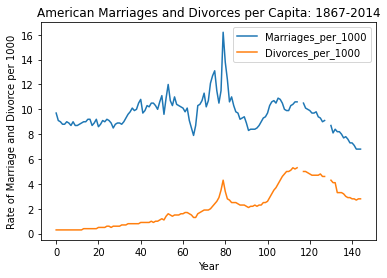

In [93]:
# create figure and axis
fig, ax = plt.subplots()

# plot each column: Marriage and Divorce Rates
for column in columns:
    ax.plot(x_data, marriages[column])
       
# label graph and axes, add legend
ax.set_title('American Marriages and Divorces per Capita: 1867-2014')
ax.legend(columns)
plt.xlabel("Year")
plt.ylabel("Rate of Marriage and Divorce per 1000")

## Question 7 - Marriages and Divorces
### Vertical Bar Chart

In [94]:
# import libraries for plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# select subsets of DataFrame (for years 1900, 1950, 2000)
q7_1900 = marriages[marriages.Year ==1900]
q7_1950 = marriages[marriages.Year ==1950]
q7_2000 = marriages[marriages.Year ==2000]

import plotly.graph_objs as go

# create traces for each rate for each year
trace1 = go.Bar(
                x = q7_1900.Year,
                y = q7_1900.Marriages_per_1000,
                name = 'Marriage Rate in 1900',
                marker = dict(color = '#afcfee', line=dict(color='rgb(0,0,0)',width=1.5))
                )
trace2 = go.Bar(
                x = q7_1900.Year,
                y = q7_1900.Divorces_per_1000,
                name = 'Divorce Rate in 1900',
                marker = dict(color = '#cceacf', line=dict(color='rgb(0,0,0)',width=1.5))
                )
trace3 = go.Bar(
                x = q7_1950.Year,
                y = q7_1950.Marriages_per_1000,
                name = 'Marriage Rate in 1950',
                marker = dict(color = '#afcfee', line=dict(color='rgb(0,0,0)',width=1.5))
                )
trace4 = go.Bar(
                x = q7_1950.Year,
                y = q7_1950.Divorces_per_1000,
                name = 'Divorce Rate in 1950',
                marker = dict(color = '#cceacf', line=dict(color='rgb(0,0,0)',width=1.5))
                )
trace5 = go.Bar(
                x = q7_2000.Year,
                y = q7_2000.Marriages_per_1000,
                name = 'Marriage Rate in 2000',
                marker = dict(color = '#afcfee', line=dict(color='rgb(0,0,0)',width=1.5))
                )
trace6 = go.Bar(
                x = q7_2000.Year,
                y = q7_2000.Divorces_per_1000,
                name = 'Divorce Rate in 2000',
                marker = dict(color = '#cceacf', line=dict(color='rgb(0,0,0)',width=1.5))
                )

# define data, layout, add titles, label axes
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = dict(title = 'American Marriage and Divorce Rates in 1900, 1950, and 2000',
             xaxis = dict(title = 'Year'),
             yaxis = dict(title = 'Rate of Marriage and Divorce (per 1000)'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Question 8 - Hollywood's Deadliest Actors
### Horizontal Bar Chart

In [95]:
#import pandas to use DataFrame
import pandas as pd

# import data into DataFrame
hollywood = pd.read_csv('actor_kill_counts.csv')
hollywood

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


Text(0.5, 1.0, "Hollywood's Top 10 Deadliest Actors by On-Screen Kills ")

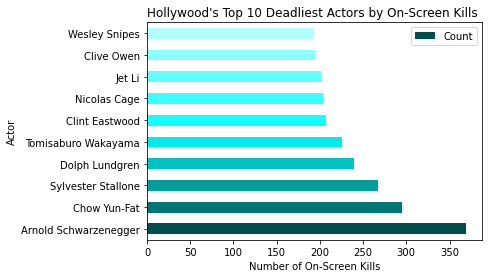

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

# create colour scheme
colours = ['#004e4e', '#007676', '#009d9d', '#00c4c4', '#00ebeb',
           '#14ffff', '#3bffff', '#62ffff', '#89ffff', '#b1ffff']

# Create bar chart, sorted kill count in descending order
q8 = hollywood.sort_values('Count', ascending = False).plot.barh(x='Actor', y='Count', color = colours)

#label axes, title
q8.set_ylabel("Actor")
q8.set_xlabel("Number of On-Screen Kills")
q8.set_title("Hollywood's Top 10 Deadliest Actors by On-Screen Kills ")

## Question 9 - Roman Emperors
### Pie Chart

In [97]:
import pandas as pd
# add data to DataFrame
RomanEmp = pd.read_csv("roman-emperor-reigns.csv")
RomanEmp.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [98]:
# group by cause of death and sum totals of each death type
death = RomanEmp.groupby('Cause_of_Death').count().drop(columns='Length_of_Reign')

# sort in decreasing order
death.sort_values(by=['Emperor'], ascending = False)

,Emperor
Cause_of_Death,
Assassinated,22
Natural causes,16
Killed in battle,8
Possibly assassinated,8
Illness,5
Suicide,5
Executed,3
Died in captivity,1


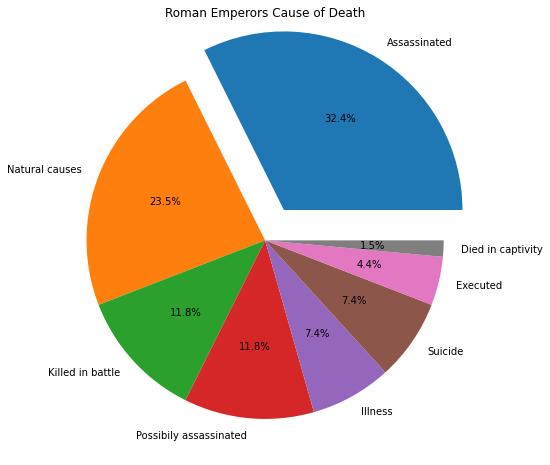

In [99]:
import matplotlib.pyplot as plt
import numpy as np
 
# specify data
y = np.array([22, 16, 8, 8, 5, 5, 3, 1])
label = ["Assassinated", 'Natural causes', 'Killed in battle', 'Possibily assassinated', 
         'Illness', 'Suicide','Executed', 'Died in captivity']  
          
# explode on 'Assassinated'
explode = (0.2, 0, 0, 0, 0, 0, 0, 0)

# create plot
fig1, ax1 = plt.subplots(figsize=(8,8))

# set labels, axes, title
ax1.axis('equal')
ax1.pie(y, labels = label, autopct = '%1.1f%%', explode = explode)
ax1.set_title('Roman Emperors Cause of Death')

plt.show()

## Question 10 - Arcades and PhDs
### Scatter Plot

In [100]:
# import pandas to use DataFrame
import pandas as pd 

# import csv file and put in DataFrame
arcade_PhDs = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_PhDs

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


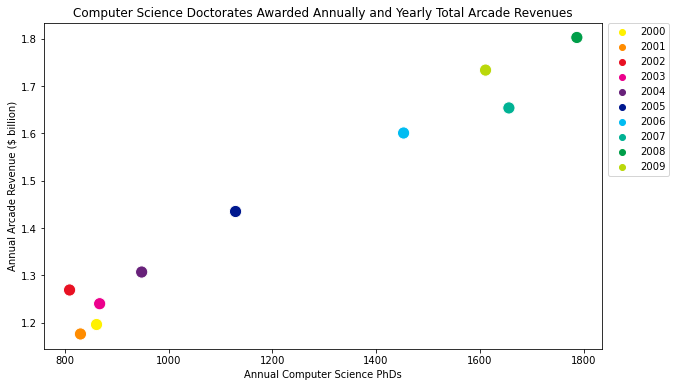

In [101]:
# import seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

#increase size of figure
plt.figure(figsize=(10,6))

# create scatter plot, set title, specify colours of data points, increase size of data points
q10 = sns.scatterplot(x='Computer Science Doctorates Awarded (US)', 
                y = 'Total Arcade Revenue (billions)', 
                data = arcade_PhDs, hue = 'Year', s=150,  
                palette = ['#fff100', '#ff8c00', '#e81123', 
                           '#ec008c', '#68217a', '#00188f', '#00bcf2', 
                          '#00b294', '#009e49', '#bad80a'],
                 ).set_title('Computer Science Doctorates Awarded Annually'
                           ' and Yearly Total Arcade Revenues')
# label axes
plt.xlabel('Annual Computer Science PhDs')
plt.ylabel('Annual Arcade Revenue ($ billion)')

# move legend to outside of box
plt.legend(bbox_to_anchor=(1.01,1), borderaxespad=0)